# Matplotlib

In [31]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Interactive Plotting with Pyplot’s Global State

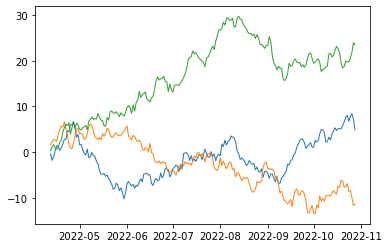

In [32]:
from datetime import datetime

#reates a Pandas datetime index with 200 day (d) elements, 
# starting from the current time (datetime.now()).
x = pd.period_range(datetime.now(), periods= 200, freq='d')

# Converts datetime index to Python datetimes.
x = x.to_timestamp().to_pydatetime()

# Creates three 200-element random arrays summed along the 0 axis
y = np.random.randn(200, 3).cumsum(0) # Tính tổng các phần tử của mảng

plt.plot(x, y)

### Configuring Matplotlib

For more infomation: https://matplotlib.org/1.4.0/users/customizing.html#a-sample-matplotlibrc-file

In [33]:
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.color'] = 'r'

### Setting the Figure’s Size

In [34]:
# set figure size to 8x4 inches
plt.rcParams['figure.figsize'] = (8,4)
plt.gcf().set_size_inches(8, 4) # gcf() = get current figure

<Figure size 576x288 with 0 Axes>

### Points, Not Pixels

- Matplotlib uses points, not pixels, to measure the size of its figures. 
- By default a point is approximately 1/72 of an inch wide, but Matplotlib allows you to adjust this by changing the dots-per-inch (dpi) for any figures generated.

### Labels and Legends

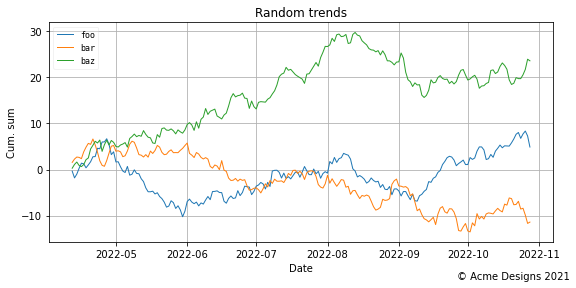

In [35]:
plots = plt.plot(x, y)
plt.legend(plots, ('foo', 'bar', 'baz'), # Sets the labels for our three plots.
           loc= 'best', # Using the best location should avoid obscuring lines.
           framealpha=0.25, # Sets the legend’s transparency.
           prop={'size':'small', 'family':'monospace'}) # Here we adjust the font properties of the legend.
plt.gcf().set_size_inches(8, 4) # gcf() = get current figure
plt.title('Random trends')
plt.xlabel('Date')
plt.ylabel('Cum. sum')
plt.grid(True) # This will add a dotted grid to the figure, marking the axis ticks.
plt.figtext(0.995, 0.01, # The location of the text proportionate to figure size.
            u'\u00a9 Acme Designs 2021', 
            ha='right', va='bottom') # Horizontal (ha) and vertical (va) alignment.

#  The tight_layout method should guarantee that all your plot elements are within the figure box. 
# Otherwise, you might find tick-labels or legends truncated.
plt.tight_layout()

## Figures and Object-Oriented Matplotlib

We can create a figure by using Pyplot’s figure method:

In [36]:
fig = plt.figure(
    figsize=(8,4), # figure size in inches
    dpi=200, # dots per inch
    tight_layout=True, # fit axes, labels, etc. to canvas
    linewidth=1, edgecolor='r' # 1 pixel wide, red border
)

<Figure size 1600x800 with 0 Axes>

### Axes and Subplots

Positioning of plot elements uses a `0 → 1` coordinate system, where 1 is the width or height of the figure. You can specify the position using a `four-element` list or tuple to set `bottom-left` and `top-right` bounds `[bottom(h*0.2), left(w*0.2), top(h*0.8), right(w*0.8)]`:

In [37]:
fig.add_axes([0.2, 0.2, 0.8, 0.8]) # [left, bottom, width, height]

<Axes:>

[]

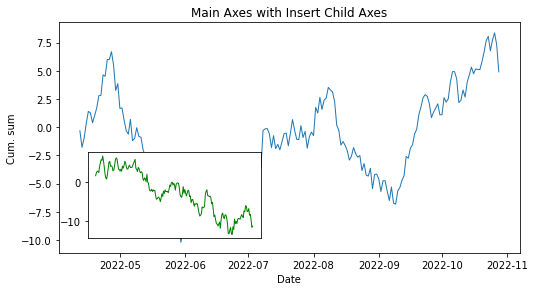

In [38]:
fig = plt.figure(figsize=(8,4))
# --- Main Axes
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title('Main Axes with Insert Child Axes')
ax.plot(x, y[:,0]) # This selects the first column of our random NumPy y-data.
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
# --- Inserted Axes
ax = fig.add_axes([0.15, 0.15, 0.3, 0.3])
ax.plot(x, y[:,1], color='g') # 'g' for green
ax.set_xticks([])

Plotting with single figure and axes

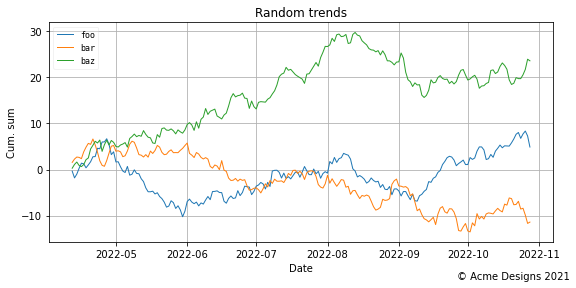

In [39]:
figure, ax = plt.subplots()
plots = ax.plot(x, y, label='')
figure.set_size_inches(8, 4)
ax.legend(plots, ('foo', 'bar', 'baz'), loc='best', framealpha=0.25,
prop={'size':'small', 'family':'monospace'})
ax.set_title('Random trends')
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
ax.grid(True)
figure.text(0.995, 0.01, u'\u00a9 Acme Designs 2021',
ha='right', va='bottom')
figure.tight_layout()

Text(0.5, 0, 'Date')

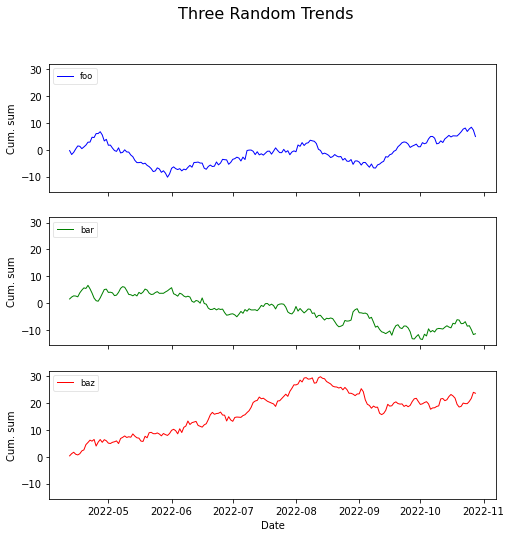

In [40]:
fig, axes = plt.subplots(
                    nrows=3, ncols=1, # Specifies a subplot grid of three rows by one column.
                    sharex=True, sharey=True, # We want to share x- and y-axes, automatically adjusting limits for easy comparison.
                    figsize=(8, 8))
labelled_data = zip(y.transpose(), # Switch y to row-column and zip the line data, labels, and line colors together.
                    ('foo', 'bar', 'baz'), ('b', 'g', 'r')) 
fig.suptitle('Three Random Trends', fontsize=16)
for i, ld in enumerate(labelled_data):
    ax = axes[i]
    ax.plot(x, ld[0], label=ld[1], color=ld[2])
    ax.set_ylabel('Cum. sum')
    ax.legend(loc='upper left', framealpha=0.5,
              prop={'size':'small'})
axes[-1].set_xlabel('Date') # Labels the last of the shared x-axes.

Note:
```python
letters = ['a', 'b']
numbers = [1, 2]
zip(letters, numbers)
Out:
[('a', 1), ('b', 2)]
```

## Plot Types

### Bar Charts

**A simple bar chart**

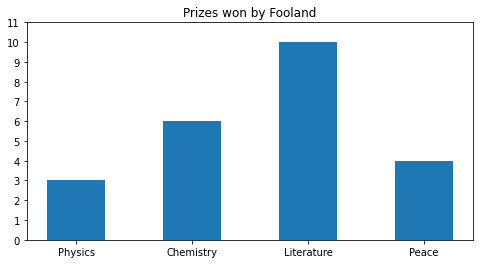

In [43]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data =   [3, 6, 10, 4]

bar_width = 0.5
#Here we create the middle bar locations, two bar_width’s apart.
xlocations = np.array(range(len(foo_data))) + bar_width 
plt.bar(xlocations, foo_data, width=bar_width)
plt.yticks(range(0, 12))
#This places tick labels at the middle of the bars.
plt.xticks(xlocations, labels) 
plt.title("Prizes won by Fooland")
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gcf().set_size_inches((8, 4))

**Creating a grouped bar chart**

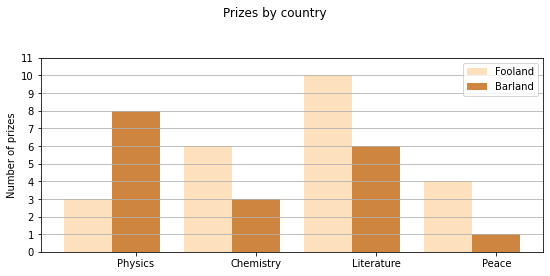

In [44]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data = [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))

# With a width of 1 for our two-bar groups, this bar width gives 0.1 bar padding.
bar_width = 0.4
xlocs = np.arange(len(foo_data))

# Matplotlib supports standard HTML colors, taking hex values or a name.
ax.bar(xlocs-bar_width, foo_data, bar_width,
       color='#fde0bc', label='Fooland')
ax.bar(xlocs, bar_data, bar_width, color='peru', label='Barland')
#--- ticks, labels, grids, and title
ax.set_yticks(range(12))
ax.set_xticks(ticks=range(len(foo_data)))
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')
fig.suptitle('Prizes by country')

# We use the pad argument to specify padding around the figure 
# as a fraction of the font size.
fig.tight_layout(pad=2)

# This saves the figure at the high resolution of 200 dots per inch.
fig.savefig('mpl_barchart_multi.png', dpi=200) 

**Converting to horizontal bars**

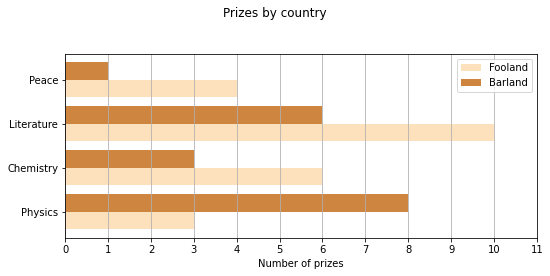

In [47]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data = [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))
# With a width of 1 for our two-bar groups, this bar width gives 0.1 bar padding.
bar_width = 0.4

ylocs = np.arange(len(foo_data))

# To create a horizontal bar chart, we use barh in place of bar.
ax.barh(ylocs-bar_width, foo_data, bar_width, color='#fde0bc',
        label='Fooland') 
ax.barh(ylocs, bar_data, bar_width, color='peru', label='Barland')
# --- labels, grids and title, then save
# A horizontal chart necessitates swapping the horizontal and vertical axes.
ax.set_xticks(range(12)) 
ax.set_yticks(ticks=ylocs-bar_width/2)
ax.set_yticklabels(labels)
ax.xaxis.grid(True)
ax.legend(loc='best')
ax.set_xlabel('Number of prizes')

fig.suptitle('Prizes by country')

# We use the pad argument to specify padding around the figure 
# as a fraction of the font size.
fig.tight_layout(pad=2)

# This saves the figure at the high resolution of 200 dots per inch.
fig.savefig('mpl_barchart_multi.png', dpi=200) 

**Converting to stacked bars**

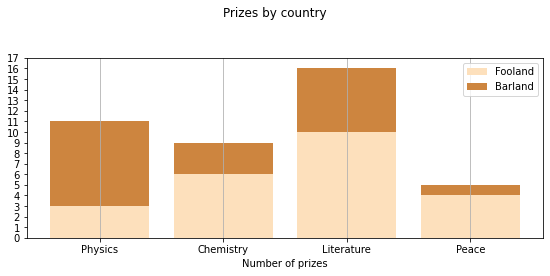

In [49]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data = [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.8
xlocs = np.arange(len(foo_data))

# The foo_data and bar_data bar groups share the same x-locations.
ax.bar(xlocs, foo_data, bar_width, color='#fde0bc', 
       label='Fooland')

# The bottom of the bar_data group is the top of the foo_data, providing stacked bars.
ax.bar(xlocs, bar_data, bar_width, color='peru', 
       label='Barland', bottom=foo_data)
# --- labels, grids and title, then save
ax.set_yticks(range(18))
ax.set_xticks(ticks=xlocs)
ax.set_xticklabels(labels)

ax.xaxis.grid(True)
ax.legend(loc='best')
ax.set_xlabel('Number of prizes')

fig.suptitle('Prizes by country')

# We use the pad argument to specify padding around the figure 
# as a fraction of the font size.
fig.tight_layout(pad=2)

# This saves the figure at the high resolution of 200 dots per inch.
fig.savefig('mpl_barchart_multi.png', dpi=200) 

### Scatter Plots

**A simple scatter plot**

Text(0.5, 0.98, 'A Simple Scatterplot')

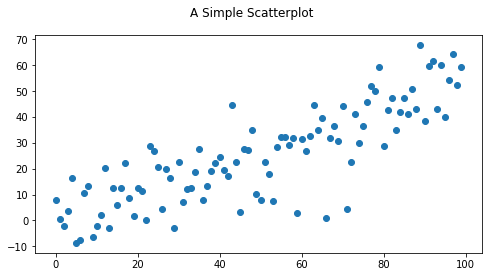

In [50]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))

# randn gives normally distributed random numbers, 
# which we scale to be within 0 and 10 and to which we then add an x-dependent value.
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))

# The equally sized x and y arrays provide the point coordinates.
ax.scatter(x, y)

fig.suptitle('A Simple Scatterplot')

**Adjusting point size and color**

Text(0.5, 0.98, 'Scatterplot with Color and Size Specified')

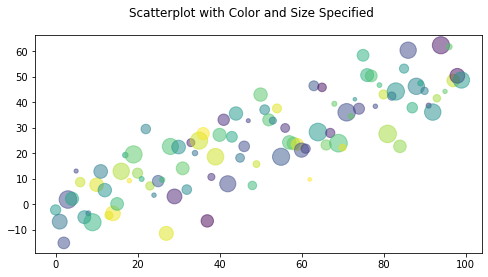

In [51]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
# This produces 100 random color values between 0 and 1 for the default colormap.
colors = np.random.rand(num_points) 
# We use the power notation ** to square values between 2 and 10, 
# the width range for our markers.
size = np.pi * (2 + np.random.rand(num_points) * 8) ** 2
# We use the alpha argument to make our markers half-transparent.
ax.scatter(x, y, s=size, c=colors, alpha=0.5)
fig.suptitle('Scatterplot with Color and Size Specified')

**Scatter plot with regression line**

Text(0.5, 0.98, 'Scatterplot With Regression-line')

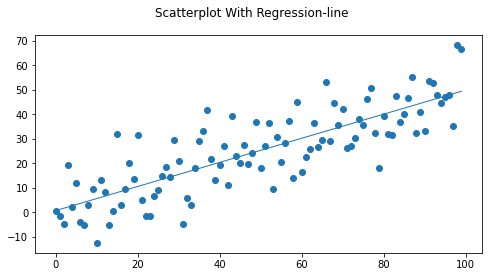

In [52]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)
# We use NumPy’s polyfit in 1D to get a line gradient (m) 
# and constant (c) for a best-fit line through our random points.
m, c = np.polyfit(x, y ,1)
# Use the gradient and constant to plot a line on the scatter plot’s axes (y = mx + c).
ax.plot(x, m*x + c)
fig.suptitle('Scatterplot With Regression-line')

# Updating....